In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/manufacturing-data-for-polynomial-regression/manufacturing.csv


In [40]:
df=pd.read_csv("/kaggle/input/manufacturing-data-for-polynomial-regression/manufacturing.csv")

In [69]:
df.tail()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,100.000000
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,99.999997
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,99.989318
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,99.999975
3956,163.359996,24.332133,3974.897121,41092.392901,4.358913e+06,100.000000


In [42]:
df.isnull().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

In [43]:
df.duplicated().sum()

0

In [58]:
df.shape

(3957, 6)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [45]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

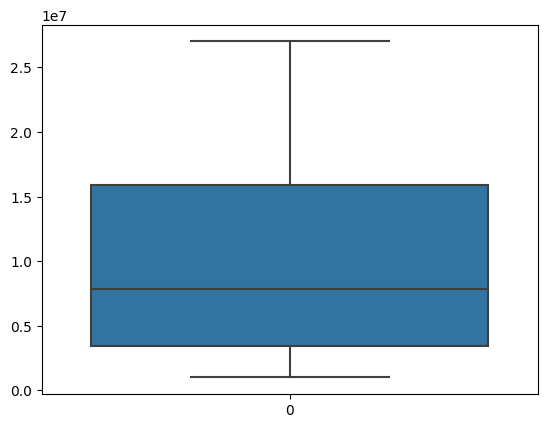

In [48]:
sns.boxplot(df['Material Transformation Metric'])
plt.show()

<Axes: >

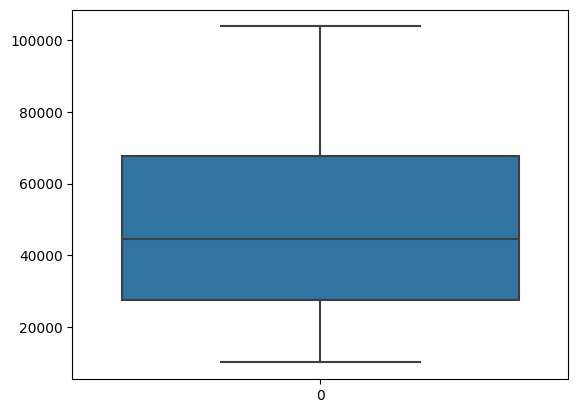

In [49]:
sns.boxplot(df['Material Fusion Metric'])

<Axes: >

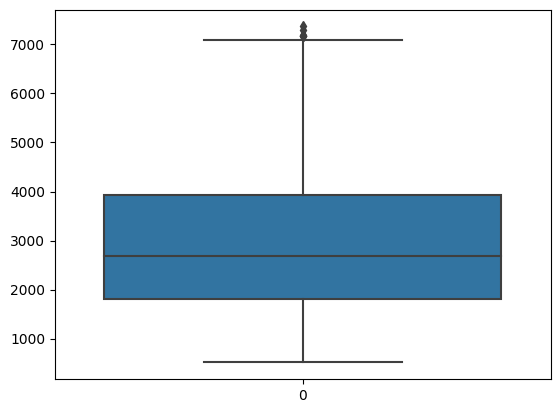

In [50]:
sns.boxplot(df['Temperature x Pressure'])

In [51]:
Q1=df['Temperature x Pressure'].quantile(0.25)
Q3=df['Temperature x Pressure'].quantile(0.75)
IQR=Q3-Q1

In [52]:
outliers = (df['Temperature x Pressure'] < (Q1 - 1.5 * IQR)) | (df['Temperature x Pressure'] > (Q3 + 1.5 * IQR))

In [53]:
outliers.sum()

6

In [54]:
df_filtered=df[~outliers]

In [57]:
df_filtered.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


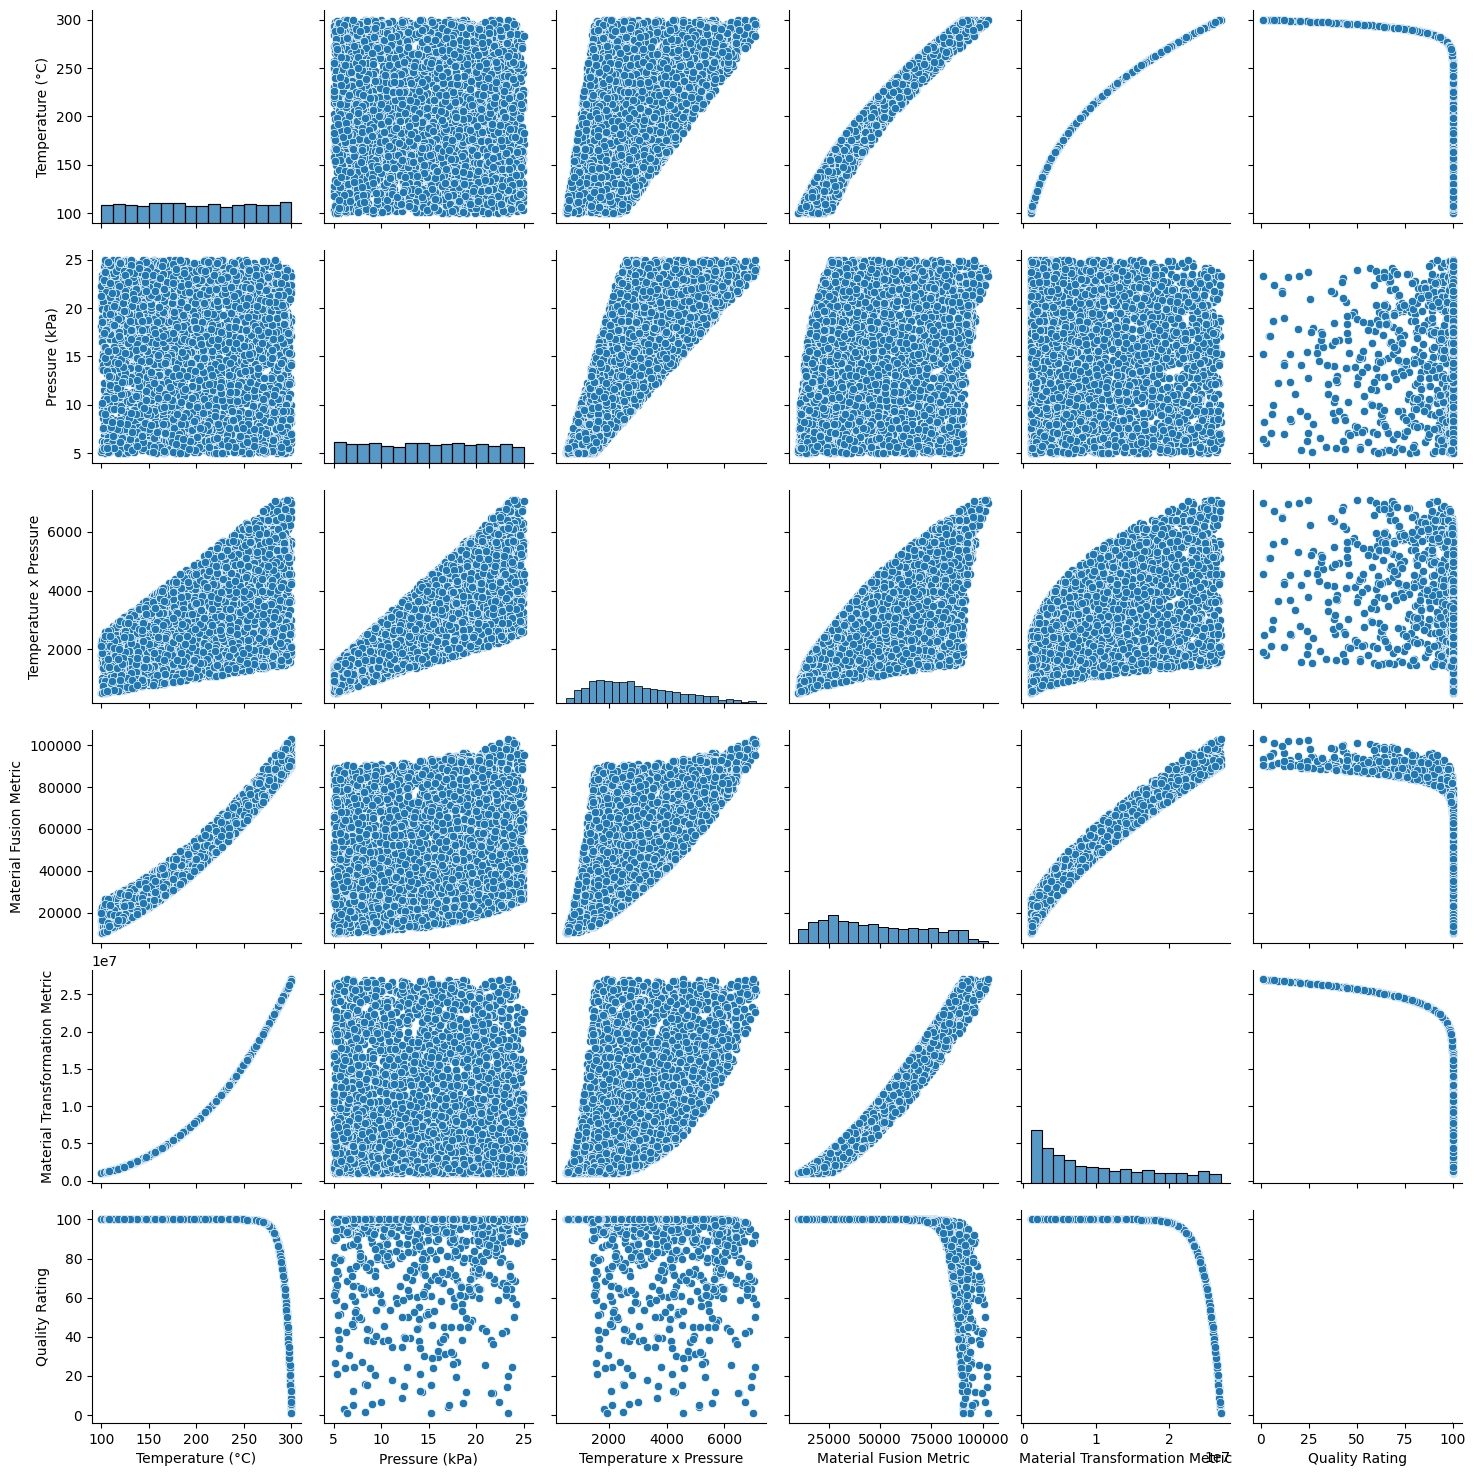

In [55]:
sns.pairplot(df_filtered)

In [70]:
x=df_filtered.iloc[:,:5]
y=df_filtered['Quality Rating']

In [71]:
x.shape,y.shape

((3951, 5), (3951,))

In [75]:
from sklearn.preprocessing import PolynomialFeatures

In [78]:
pf=PolynomialFeatures()
x=pf.fit_transform(x)

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [85]:
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(92.24490517480668, 92.8479187159066)

In [91]:
y_pred1=lr.predict(x_train)
y_pred2=lr.predict(x_test)

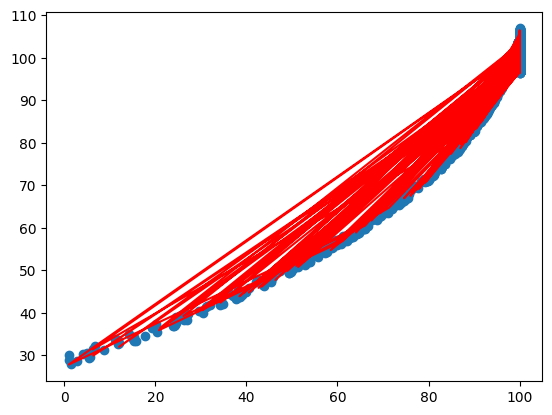

In [93]:
plt.scatter(y_train,y_pred1)
plt.plot(y_test,y_pred2,color='red')